# **Trends in Thefts from Vehicles in San Francisco from January 2018 to November 2022**

## **Defining Time Periods for Reference:** 

*Pre-COVID:* Period before March 17, 2020

*Peak-COVID:* March 17, 2020 and December 31, 2021

*Post-COVID:* Period after December 31, 2021 til November 7, 2022

#### Note: Dataset was downloaded on November 7, 2022

Original dataset: https://drive.google.com/file/d/151pywOysoyVTpCjNwprf2wBAEHxvT56M/view?usp=sharing

## **Libraries and Data Cleaning**

In [89]:
#downloading all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#downloading csv 
sf_car_thefts = pd.read_csv("sf_car_thefts.csv")

In [91]:
#Removing duplicate IDs and only keeping the first value
print("length with duplicate IDs", len(sf_car_thefts))
sf_car_thefts = sf_car_thefts.drop_duplicates(subset = "Incident ID", keep= 'first')
print("length without duplicate IDs", len(sf_car_thefts))

length with duplicate IDs 113400
length without duplicate IDs 113400


In [92]:
#converting to datetime 
sf_car_thefts['Incident Date'] =  pd.to_datetime(sf_car_thefts['Incident Date'], format= '%Y/%m/%d')
#adding Incident Month Day
sf_car_thefts['Incident Day of Month'] = sf_car_thefts['Incident Date'].dt.day

In [93]:
#subsetting pre-COVID, peak COVID and post-COVID
sf_car_thefts['Incident Date'] =  pd.to_datetime(sf_car_thefts['Incident Date'], format= '%Y/%m/%d')

pre_covid = sf_car_thefts[sf_car_thefts['Incident Date'] < '2020-03-17']
peak_covid = sf_car_thefts[(sf_car_thefts['Incident Date'] >= '2020-03-17') & 
                            (sf_car_thefts['Incident Date'] <= '2021-12-31')]
post_covid = sf_car_thefts[sf_car_thefts['Incident Date'] > '2021-12-31']

In [94]:
#subsetting by year
sf_car_thefts_18 = sf_car_thefts[sf_car_thefts['Incident Date'] <= '2018-12-31']
sf_car_thefts_19 = sf_car_thefts[(sf_car_thefts['Incident Date'] <= '2019-12-31') &
                                (sf_car_thefts['Incident Date'] > '2018-12-31')]
sf_car_thefts_20 = sf_car_thefts[(sf_car_thefts['Incident Date'] <= '2020-12-31') &
                                (sf_car_thefts['Incident Date'] > '2019-12-31')]
sf_car_thefts_21 = sf_car_thefts[(sf_car_thefts['Incident Date'] <= '2021-12-31') &
                                (sf_car_thefts['Incident Date'] > '2020-12-31')]
sf_car_thefts_22 = sf_car_thefts[(sf_car_thefts['Incident Date'] <= '2022-12-31') &
                                (sf_car_thefts['Incident Date'] > '2021-12-31')]

## **Thefts from Vehicles Monthly**

### Overall Thefts from Cars in San Francisco (Pre, Peak, and Post-COVID)

In [95]:
# Remove rows from November for the overall plot (otherwise we will have a sharp drop in thefts)
sf_car_thefts_rem_nov = sf_car_thefts[(sf_car_thefts['Incident Date'] <= '2022-10-31')]
sf_thefts_monthly = sf_car_thefts_rem_nov.groupby(['Incident Year', 'Incident Month'])['Incident ID'].count().to_frame(name = 'count')
sf_thefts_monthly

count
Incident Year Incident Month       
2018          1                2889
              2                2022
              3                2204
              4                2115
              5                2212
              6                2264
              7                2830
              8                2723
              9                2332
              10               2309
              11               2066
              12               2401
2019          1                2087
              2                1925
              3                1962
              4                1936
              5                2173
              6                2269
              7                2613
              8                2820
              9                2586
              10               2911
              11               2253
              12               2592
2020          1                2408
              2                1839
              3                1178
              4                 794
              5                 896
              6                 979
              7                1138
              8                1352
              9                1073
              10               1196
              11               1401
              12               1210
2021          1                1270
              2                1141
              3                1252
              4                1439
              5                2143
              6                2219
              7                2011
              8                1596
              9                2057
              10               2514
              11               2412
              12               2086
2022          1                1742
              2                1614
              3                1935
              4                1701
              5                1684
              6                1965
              7                2044
              8                1951
              9                2366
              10               2134

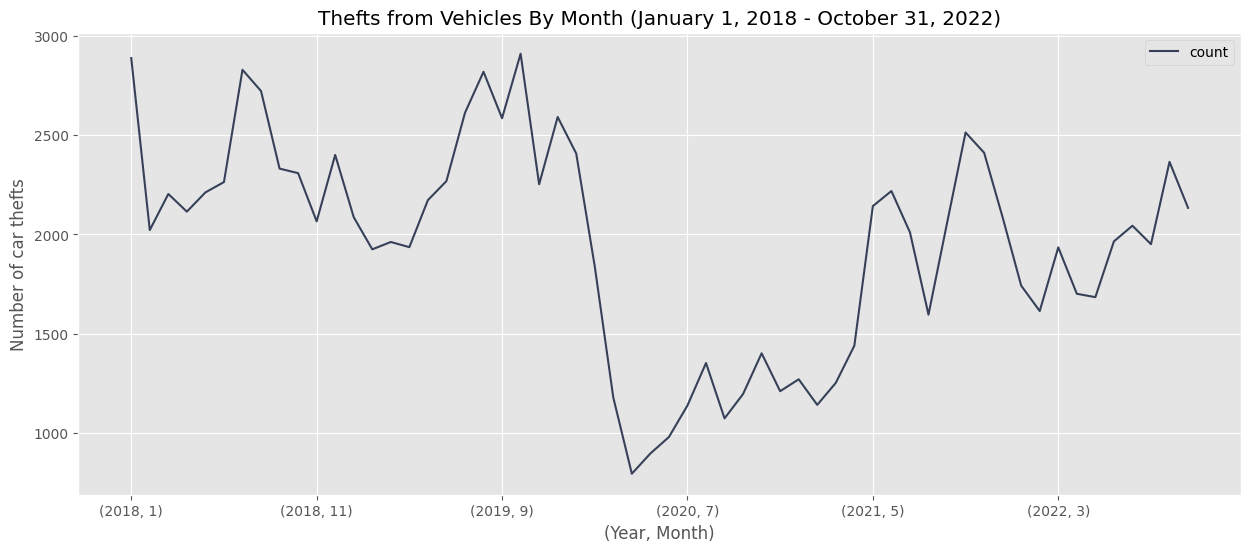

In [96]:
plt.rcParams["figure.figsize"] = (15,6)

sf_thefts_monthly.plot.line(color = '#364159')
 
plt.xlabel("(Year, Month)")
plt.ylabel("Number of car thefts")
plt.title("Thefts from Vehicles By Month (January 1, 2018 - October 31, 2022)")

plt.show()

## Monthly Trends in Thefts from Vehicles by Pre-COVID, Peak-COVID, and Post-COVID

### Number of Thefts from Cars by Month (Pre-COVID)

In [97]:
pre_COVID_monthly = pre_covid.groupby(['Incident Year', 'Incident Month'])['Incident ID'].count().to_frame(name = 'count')
pre_COVID_monthly

count
Incident Year Incident Month       
2018          1                2889
              2                2022
              3                2204
              4                2115
              5                2212
              6                2264
              7                2830
              8                2723
              9                2332
              10               2309
              11               2066
              12               2401
2019          1                2087
              2                1925
              3                1962
              4                1936
              5                2173
              6                2269
              7                2613
              8                2820
              9                2586
              10               2911
              11               2253
              12               2592
2020          1                2408
              2                1839
              3                 819

### Number of Thefts from Cars by Month (Peak-COVID)

In [98]:
peak_COVID_monthly = peak_covid.groupby(['Incident Year', 'Incident Month'])['Incident ID'].count().to_frame(name = 'count')
peak_COVID_monthly

count
Incident Year Incident Month       
2020          3                 359
              4                 794
              5                 896
              6                 979
              7                1138
              8                1352
              9                1073
              10               1196
              11               1401
              12               1210
2021          1                1270
              2                1141
              3                1252
              4                1439
              5                2143
              6                2219
              7                2011
              8                1596
              9                2057
              10               2514
              11               2412
              12               2086

### Number of Thefts from Cars by Month (Post-COVID)

In [99]:
post_COVID_monthly = post_covid.groupby(['Incident Year', 'Incident Month'])['Incident ID'].count().to_frame(name = 'count')
post_COVID_monthly

count
Incident Year Incident Month       
2022          1                1742
              2                1614
              3                1935
              4                1701
              5                1684
              6                1965
              7                2044
              8                1951
              9                2366
              10               2134
              11                166

## Average Monthly Thefts from Vehicles for Pre-, Peak, and Post-COVID

### Pre-COVID Monthly Average

In [100]:
pre_COVID_monthly['count'].sum()/26.5

2323.0188679245284

### Peak-COVID Monthly Average

In [101]:
peak_COVID_monthly['count'].sum()/21.5

1513.3953488372092

### Post-COVID Monthly Average

In [102]:
post_COVID_monthly['count'].sum()/10.25

1883.121951219512

### Bar Chart of Monthly Averages 

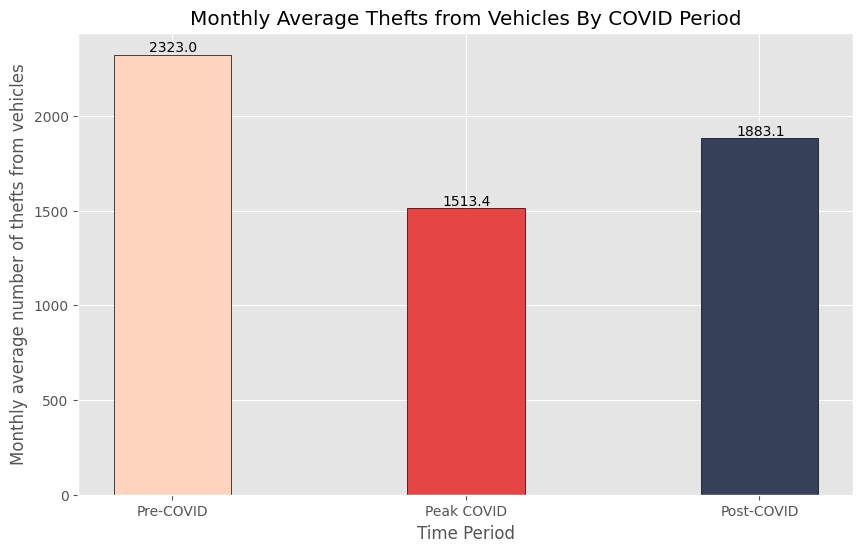

In [103]:
plt.rcParams["figure.figsize"] = (10,6)

period = ['Pre-COVID', 'Peak COVID', 'Post-COVID']
averages = [2323.0, 1513.4, 1883.1]

bars = plt.bar(period, averages, width = 0.4, color = ['#ffd4bf', '#e64545','#364159'], edgecolor = 'black')
 
plt.xlabel("Time Period")
plt.xticks(period)
plt.ylabel("Monthly average number of thefts from vehicles")
plt.title("Monthly Average Thefts from Vehicles By COVID Period")
# txt = 'Pre-COVID is before March 17, 2020, Peak COVID is from March 17, 2020 - December 31, 2021, and Post-COVID is after January 1, 2022'
# plt.figtext(0.5, 0.01, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.12, yval + 15, yval)

plt.show()

## **Weekly/Monthly Trends in Theft from Vehicle**

## Weekly Graphs

### Days of the Week Combined Graphs

In [104]:
#order of the days of the week 
order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pre_covid_bar = pd.DataFrame(pre_covid['Incident Day of Week'].value_counts()).reset_index()
pre_covid_bar = pre_covid_bar.rename(columns={"index": "Incident Day of Week", "Incident Day of Week": "count"})
pre_covid_bar['count'] = pre_covid_bar['count']/26.5
sorted_pre_covid_bar = pre_covid_bar
pre_covid_bar = pre_covid_bar.groupby(['Incident Day of Week']).sum().reindex(order) 

peak_covid_bar = pd.DataFrame(peak_covid['Incident Day of Week'].value_counts()).reset_index()
peak_covid_bar = peak_covid_bar.rename(columns={"index": "Incident Day of Week", "Incident Day of Week": "count"})
peak_covid_bar['count'] = peak_covid_bar['count']/21.5
sorted_peak_covid_bar = peak_covid_bar
peak_covid_bar = peak_covid_bar.groupby(['Incident Day of Week']).sum().reindex(order) 

post_covid_bar = pd.DataFrame(post_covid['Incident Day of Week'].value_counts()).reset_index()
post_covid_bar = post_covid_bar.rename(columns={"index": "Incident Day of Week", "Incident Day of Week": "count"})
post_covid_bar['count'] = post_covid_bar['count']/10.25
sorted_post_covid_bar = post_covid_bar
post_covid_bar = post_covid_bar.groupby(['Incident Day of Week']).sum().reindex(order) 

In [105]:
sorted_pre_covid_bar

,Incident Day of Week,count
0,Friday,357.698113
1,Saturday,354.226415
2,Sunday,347.094340
3,Wednesday,320.188679
4,Thursday,318.415094
5,Monday,318.226415
6,Tuesday,307.169811


In [106]:
sorted_peak_covid_bar

,Incident Day of Week,count
0,Friday,243.395349
1,Saturday,223.906977
2,Monday,223.116279
3,Wednesday,212.232558
4,Thursday,208.790698
5,Sunday,206.511628
6,Tuesday,195.441860


In [107]:
sorted_post_covid_bar

,Incident Day of Week,count
0,Friday,300.487805
1,Wednesday,279.317073
2,Saturday,274.536585
3,Thursday,268.292683
4,Sunday,267.121951
5,Monday,255.512195
6,Tuesday,237.853659


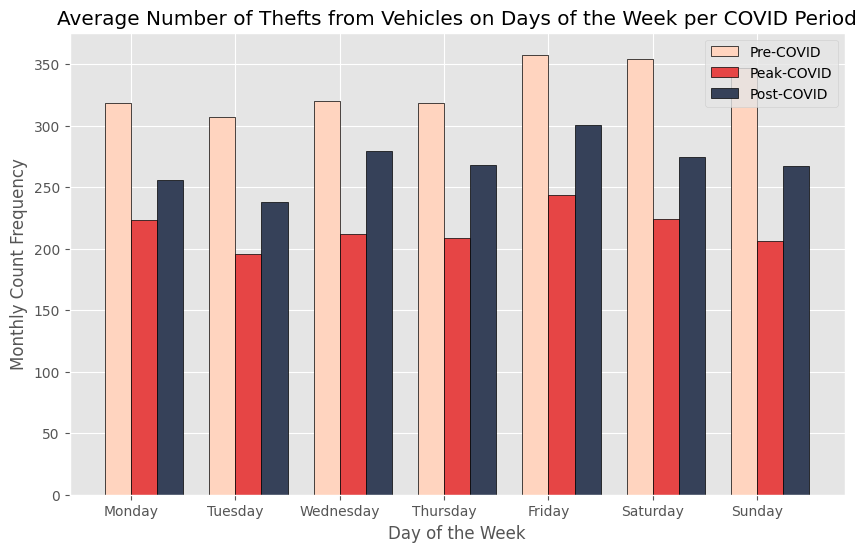

In [108]:
r = np.arange(7)
width = 0.25

plt.bar(r, pre_covid_bar['count'], color = '#ffd4bf',
        width = width, edgecolor = 'black',
        label='Pre-COVID')
plt.bar(r + width, peak_covid_bar['count'], color = '#e64545',
        width = width, edgecolor = 'black',
        label='Peak-COVID')
plt.bar(r + (2*width), post_covid_bar['count'], color = '#364159',
        width = width, edgecolor = 'black',
        label='Post-COVID')

#fig, ax = plt.subplots(figsize=(15,5))
#ax.plot(pre_covid_bar, label = "Pre-COVID")
#ax.plot(peak_covid_bar, label = "Peak-COVID")
#ax.plot(post_covid_bar, label = "Post-COVID")

        
plt.xlabel("Day of the Week")
plt.ylabel("Monthly Count Frequency")
plt.title("Average Number of Thefts from Vehicles on Days of the Week per COVID Period")
plt.rcParams["figure.figsize"] = (15,7)

plt.xticks(r + width/2,['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
plt.legend()
  
plt.show()

### Days of the Month Combined Graph

In [109]:
pre_covid_day_bar = pd.DataFrame(pre_covid['Incident Day of Month'].value_counts()).reset_index()
pre_covid_day_bar = pre_covid_day_bar.rename(columns={"index": "Incident Day of Month", "Incident Day of Month": "count"})
pre_covid_day_bar['count'] = pre_covid_day_bar['count']/26.5
sorted_pre_covid_day_bar = pre_covid_day_bar
pre_covid_day_bar = pre_covid_day_bar.groupby(['Incident Day of Month']).sum().reindex() 

peak_covid_day_bar = pd.DataFrame(peak_covid['Incident Day of Month'].value_counts()).reset_index()
peak_covid_day_bar = peak_covid_day_bar.rename(columns={"index": "Incident Day of Month", "Incident Day of Month": "count"})
peak_covid_day_bar['count'] = peak_covid_day_bar['count']/21.5
sorted_peak_covid_day_bar = peak_covid_day_bar
peak_covid_day_bar = peak_covid_day_bar.groupby(['Incident Day of Month']).sum().reindex() 

post_covid_day_bar = pd.DataFrame(post_covid['Incident Day of Month'].value_counts()).reset_index()
post_covid_day_bar = post_covid_day_bar.rename(columns={"index": "Incident Day of Month", "Incident Day of Month": "count"})
post_covid_day_bar['count'] = post_covid_day_bar['count']/10.25
sorted_post_covid_day_bar = post_covid_day_bar
post_covid_day_bar = post_covid_day_bar.groupby(['Incident Day of Month']).sum().reindex() 

In [110]:
sorted_pre_covid_day_bar

,Incident Day of Month,count
0,24,79.660377
1,18,79.660377
2,19,79.584906
3,26,79.396226
4,5,78.867925
5,27,78.415094
6,6,77.735849
7,21,77.698113
8,17,77.471698
9,28,76.943396


In [111]:
sorted_peak_covid_day_bar

,Incident Day of Month,count
0,28,55.953488
1,27,55.767442
2,26,54.232558
3,24,53.255814
4,5,52.232558
5,23,52.186047
6,21,51.069767
7,8,50.930233
8,20,50.790698
9,14,50.325581


In [112]:
sorted_post_covid_day_bar

,Incident Day of Month,count
0,20,69.560976
1,21,68.780488
2,2,68.195122
3,15,66.731707
4,5,66.634146
5,1,65.951220
6,6,65.853659
7,23,65.756098
8,10,65.073171
9,12,64.780488


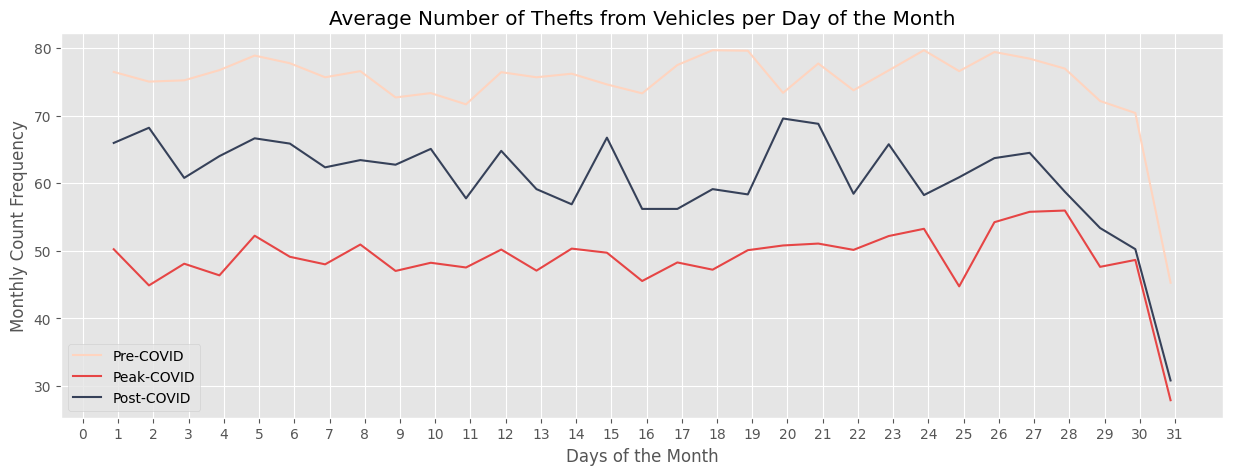

In [113]:
r = np.arange(31)
width = 0.25

#plt.bar(r, pre_covid_day_bar['count'], color = '#97b6e8',
        #Zwidth = width, edgecolor = 'black',
        #label='Pre-COVID')
#plt.bar(r + width, peak_covid_day_bar['count'], color = '#db607b',
        #width = width, edgecolor = 'black',
        #label='Peak-COVID')
#plt.bar(r + (2*width), post_covid_day_bar['count'], color = '#95c791',
        #width = width, edgecolor = 'black',
        #label='Post-COVID')
        
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pre_covid_day_bar, label = "Pre-COVID", color = '#ffd4bf')
ax.plot(peak_covid_day_bar, label = "Peak-COVID", color = '#e64545')
ax.plot(post_covid_day_bar, label = "Post-COVID", color = '#364159')
        
plt.xlabel("Days of the Month")
plt.ylabel("Monthly Count Frequency")
plt.title("Average Number of Thefts from Vehicles per Day of the Month")
plt.rcParams["figure.figsize"] = (25,10)

plt.xticks(np.arange(32) + width/2,['0','1','2','3','4','5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'])
plt.legend()
  
plt.show()

##  **District Trends in Theft from Vehicles**


### Number of Thefts from Vehicles in Each District in the Dataset



In [114]:
#count the number of rows for each police district in the dataset and make it into a dataframe. 

district_counts = pd.DataFrame(sf_car_thefts['Police District'].value_counts()).reset_index()
district_counts = district_counts.rename(columns={"index": "district", "Police District": "count"})
district_counts

,district,count
0,Central,26420
1,Northern,23697
2,Richmond,12535
3,Southern,11835
4,Mission,10626
5,Taraval,7654
6,Park,6720
7,Bayview,6008
8,Ingleside,5374
9,Tenderloin,2531


### Graph the counts

We can now visualize the spread of thefts from cars in the form of a bar chart. When we do this it is abundantly clear that the number of thefts in Central district and Nothern districts of SF are much higher than in the other police districts. 

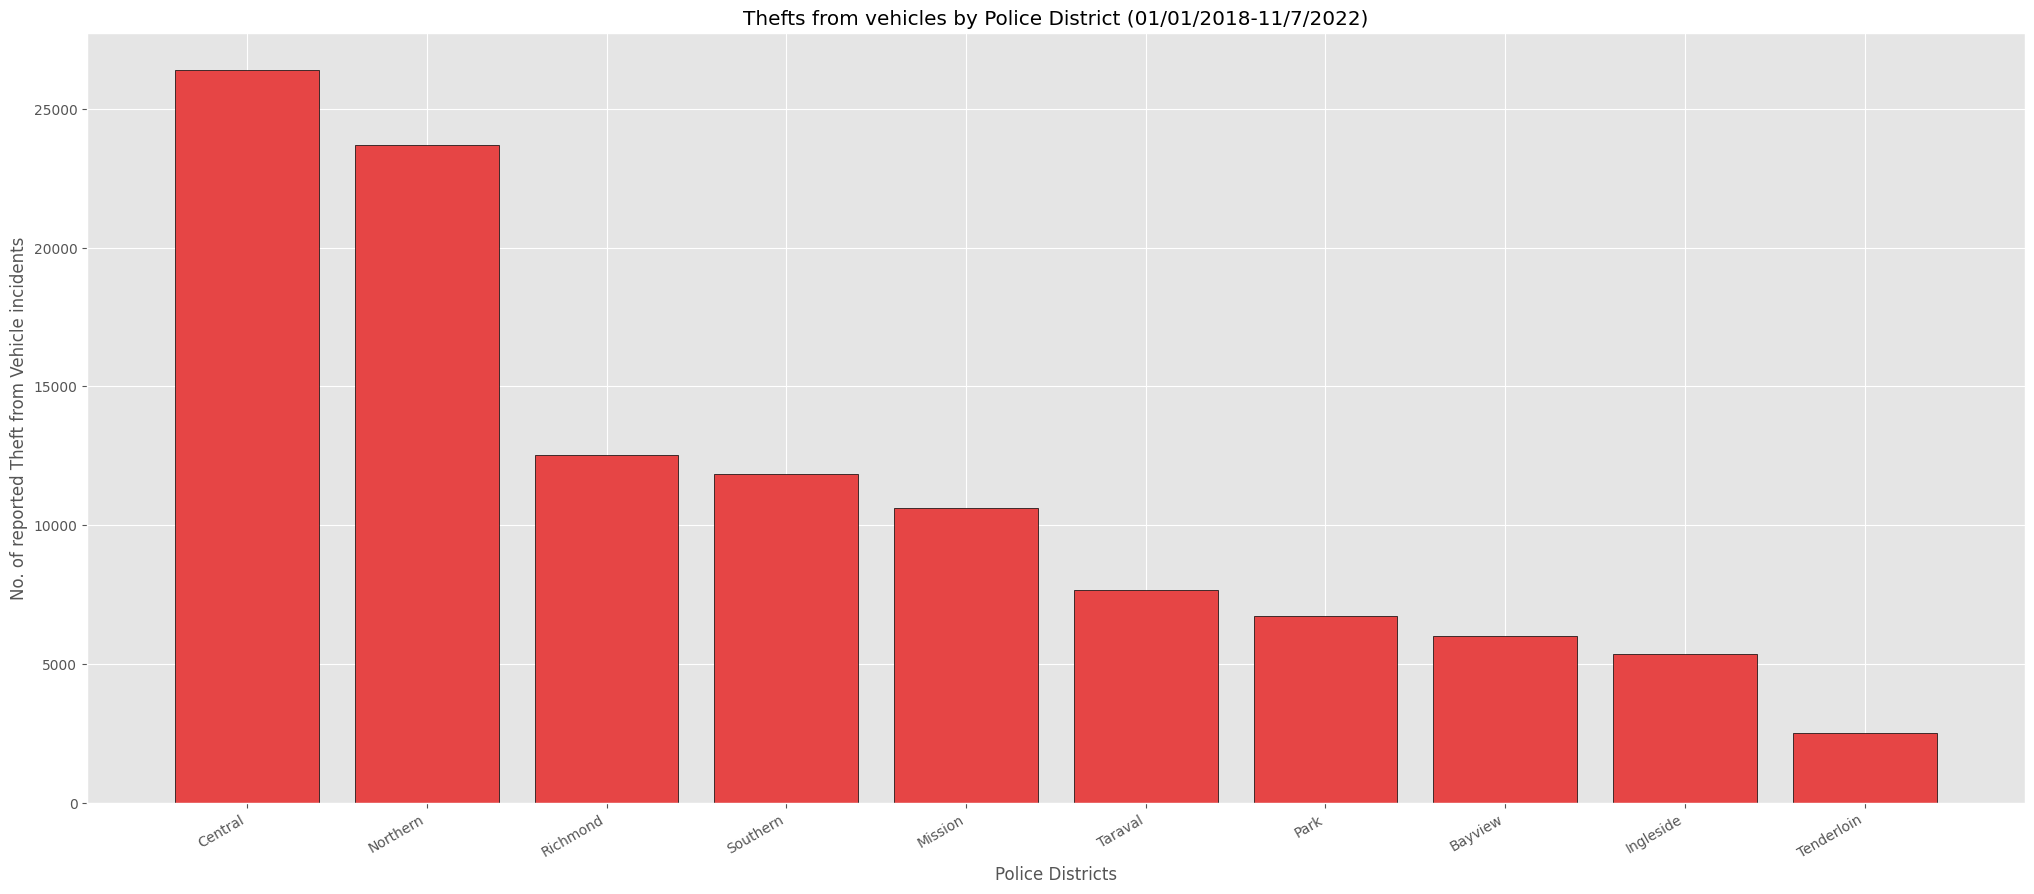

In [115]:
ax= plt.subplot()
plt.bar(district_counts['district'], district_counts['count'],color = '#e64545', edgecolor = 'black')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel("Police Districts")
plt.ylabel("No. of reported Theft from Vehicle incidents")
plt.title("Thefts from vehicles by Police District (01/01/2018-11/7/2022)")
plt.show()

## Number of Thefts from Vehicles Over Time

### Number of Thefts from Vehicles per Month pre-COVID for Each District in the Dataset

In [116]:
#get the value counts for each district and make it into a dataframe 
pre_district_counts = pd.DataFrame(pre_covid['Police District'].value_counts()).reset_index()
pre_district_counts = pre_district_counts.rename(columns={"index": "district", "Police District": "count"})

#divide each count by the number of months (26.5) for get the avg no. of thefts from cars/month for each district
pre_district_counts['count'] = pre_district_counts['count']/26.5
pre_district_counts = pre_district_counts.sort_values(by="district")

#add in a column with the avg median income rank for each district
# 1= highest avg med income, and 10=lowest avg med income
pre_district_counts['avg_med_income_rank'] = [8,9,3,7,5,1,4,6,2,10]
pre_district_counts = pre_district_counts.sort_values(by="avg_med_income_rank")

pre_district_counts

,district,count,avg_med_income_rank
7,Park,125.433962,1
5,Taraval,149.698113,2
8,Ingleside,98.981132,3
4,Richmond,244.301887,4
0,Northern,508.037736,5
2,Southern,276.452830,6
3,Mission,247.811321,7
6,Bayview,132.339623,8
1,Central,479.396226,9
9,Tenderloin,60.566038,10


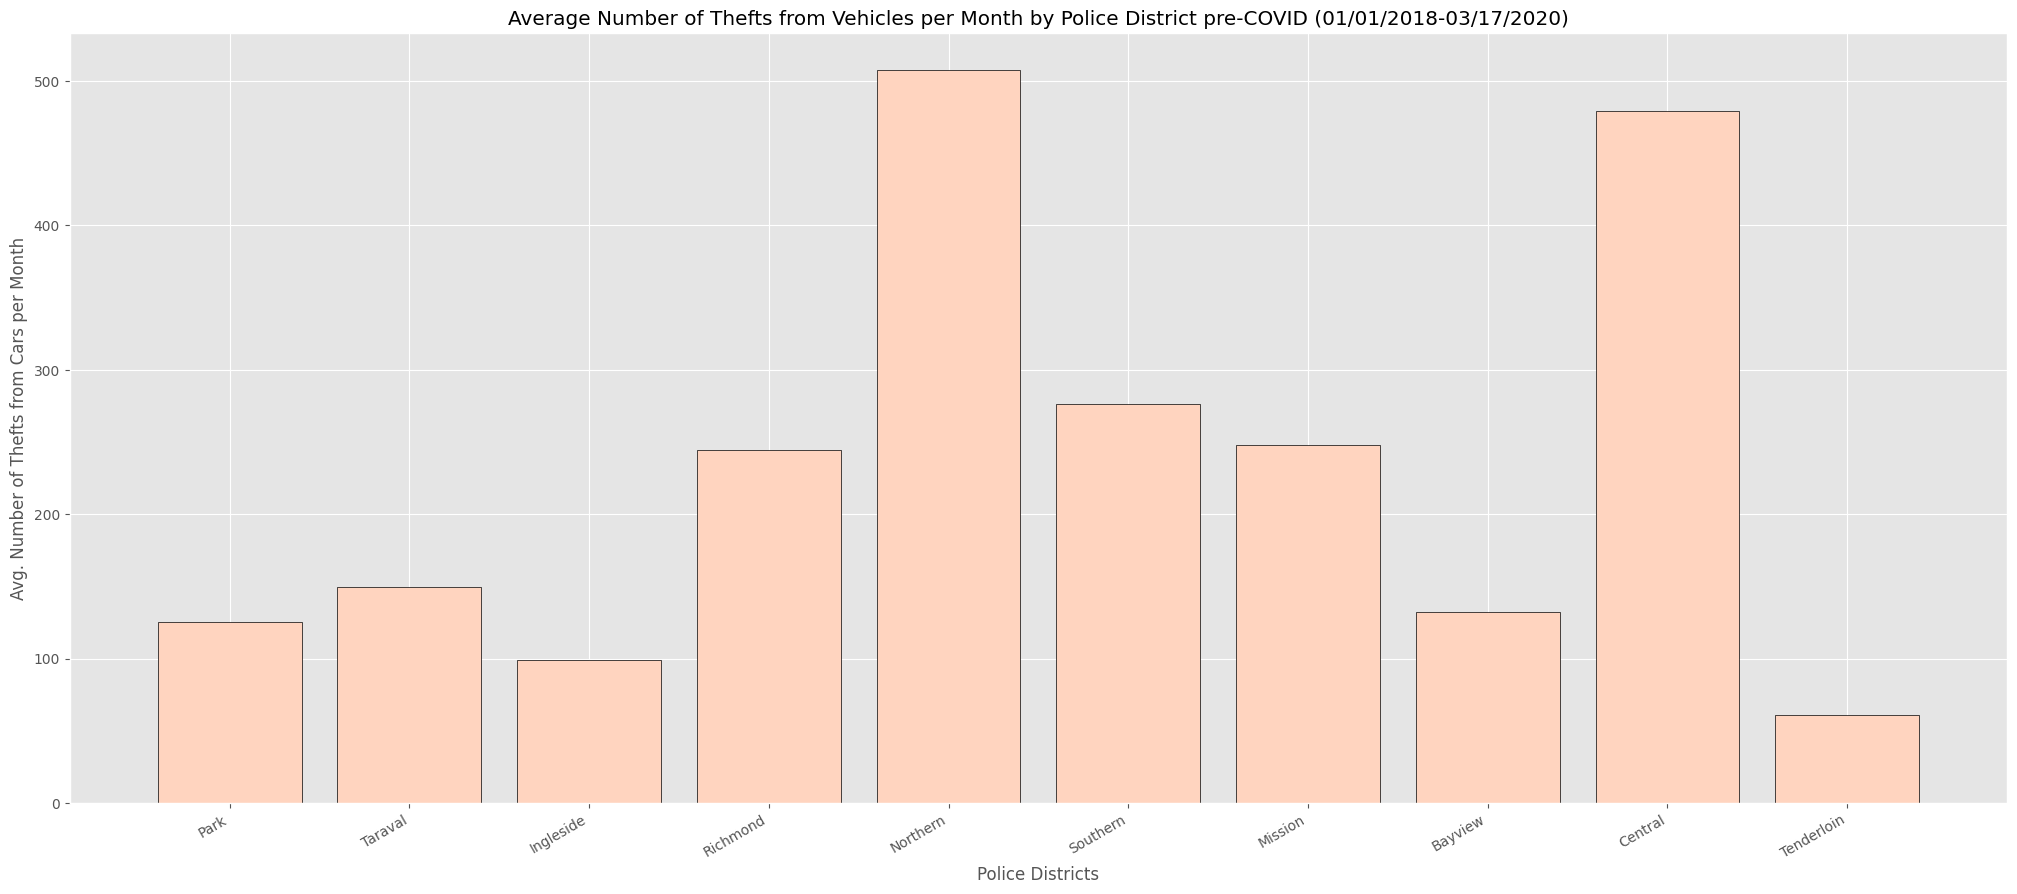

In [117]:
ax= plt.subplot()
plt.bar(pre_district_counts['district'], pre_district_counts['count'], color = '#ffd4bf', edgecolor = 'black')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel("Police Districts")
plt.ylabel('Avg. Number of Thefts from Cars per Month')
plt.title("Average Number of Thefts from Vehicles per Month by Police District pre-COVID (01/01/2018-03/17/2020)")
plt.show()

### Number of Thefts from Vehicles per Month peak-COVID for Each District in the Dataset

In [118]:
#get the value counts for each district and make it into a dataframe 
peak_district_counts = pd.DataFrame(peak_covid['Police District'].value_counts()).reset_index()
peak_district_counts = peak_district_counts.rename(columns={"index": "district", "Police District": "count"})

#divide each count by the number of months (26.5) for get the avg no. of thefts from cars/month for each district
peak_district_counts['count'] = peak_district_counts['count']/21.5
peak_district_counts = peak_district_counts.sort_values(by="district")

#add in a column with the avg median income rank for each district
# 1= highest avg med income, and 10=lowest avg med income
peak_district_counts['avg_med_income_rank'] = [8,9,3,7,5,1,4,6,2,10]
peak_district_counts = peak_district_counts.sort_values(by="avg_med_income_rank")

peak_district_counts

,district,count,avg_med_income_rank
5,Park,109.813953,1
6,Taraval,102.558140,2
7,Ingleside,87.627907,3
2,Richmond,178.372093,4
1,Northern,297.023256,5
3,Southern,122.697674,6
4,Mission,117.023256,7
8,Bayview,82.186047,8
0,Central,386.604651,9
9,Tenderloin,29.488372,10


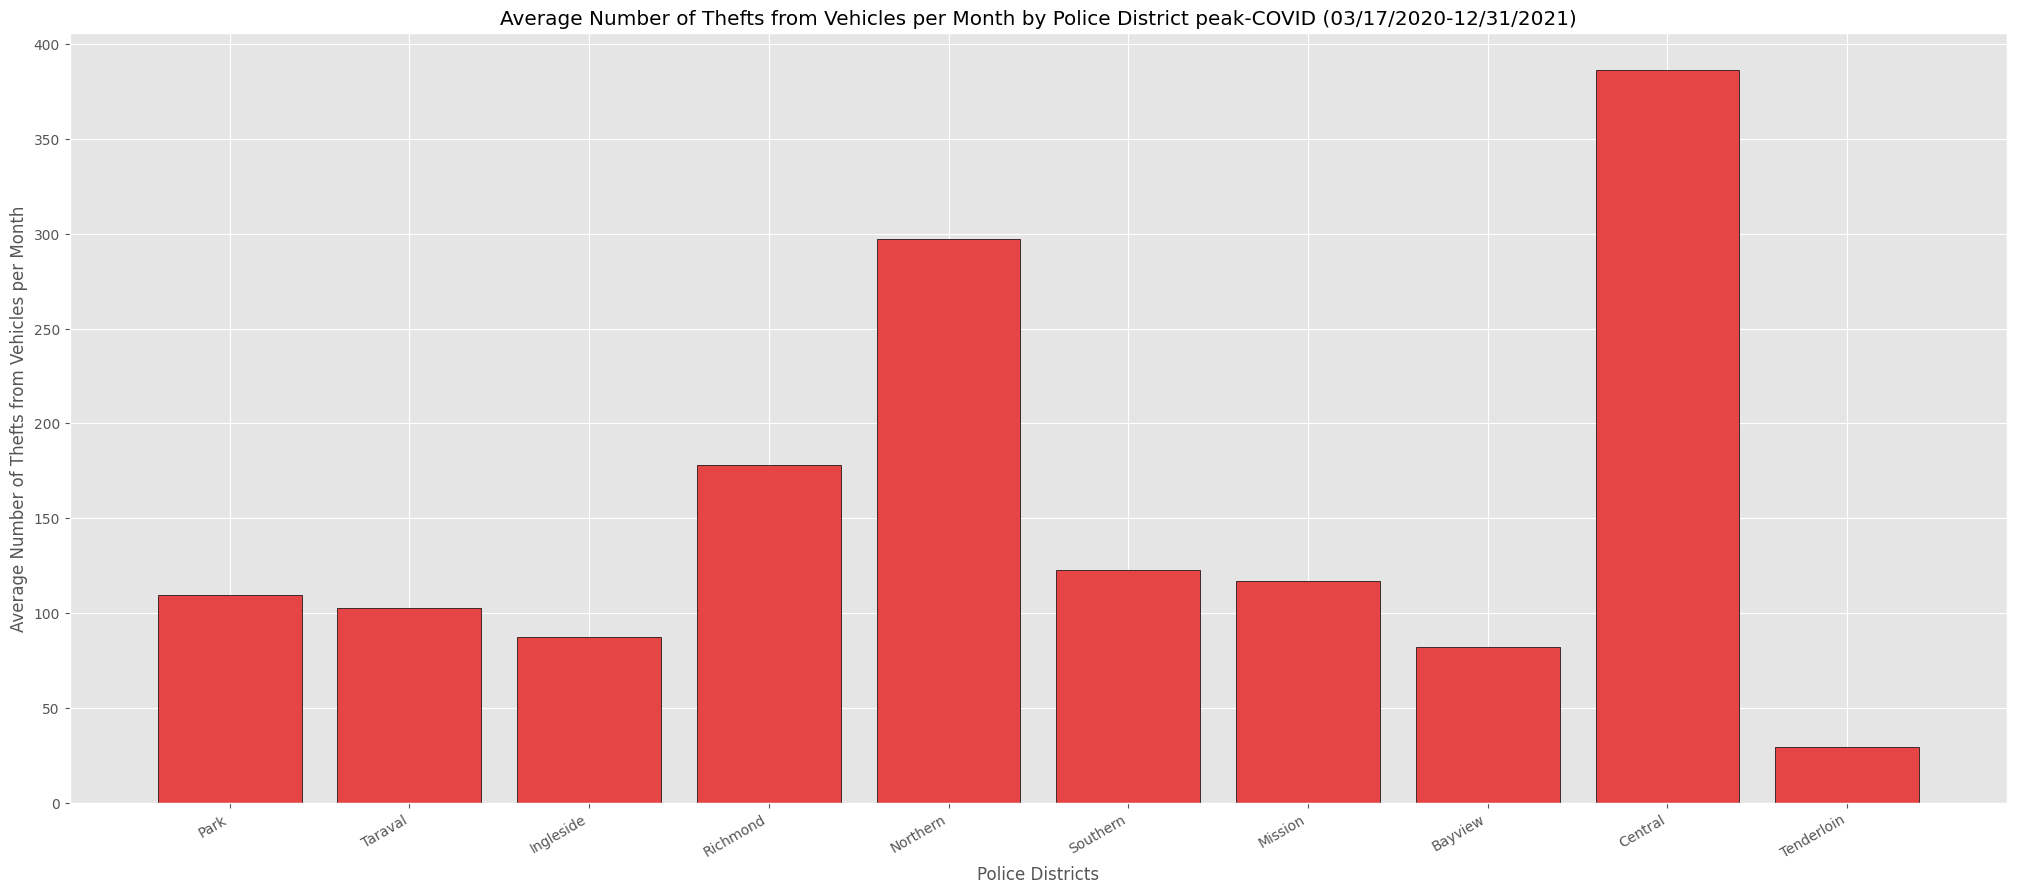

In [119]:
ax= plt.subplot()
plt.bar(peak_district_counts['district'], peak_district_counts['count'],color = '#e64545', edgecolor = 'black')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel("Police Districts")
plt.ylabel('Average Number of Thefts from Vehicles per Month')
plt.title("Average Number of Thefts from Vehicles per Month by Police District peak-COVID (03/17/2020-12/31/2021)")
plt.show()

### Number of Thefts from Vehicles per Month post-COVID for Each District in the Dataset

In [120]:
#get the value counts for each district and make it into a dataframe 
post_district_counts = pd.DataFrame(post_covid['Police District'].value_counts()).reset_index()
post_district_counts = post_district_counts.rename(columns={"index": "district", "Police District": "count"})

#divide each count by the number of months (26.5) for get the avg no. of thefts from cars/month for each district
post_district_counts['count'] = post_district_counts['count']/10.25
post_district_counts = post_district_counts.sort_values(by="district")

#add in a column with the avg median income rank for each district
# 1= highest avg med income, and 10=lowest avg med income
# Average median income rank generated from: https://www.zipdatamaps.com/zipcodes-san-francisco-ca
post_district_counts['avg_med_income_rank'] = [8,9,3,7,5,1,4,6,2,10]
post_district_counts = post_district_counts.sort_values(by="avg_med_income_rank")


post_district_counts

,district,count,avg_med_income_rank
6,Park,100.975610,1
5,Taraval,144.585366,2
7,Ingleside,84.585366,3
2,Richmond,217.170732,4
1,Northern,375.414634,5
3,Southern,182.536585,6
4,Mission,150.536585,7
8,Bayview,71.609756,8
0,Central,527.219512,9
9,Tenderloin,28.487805,10


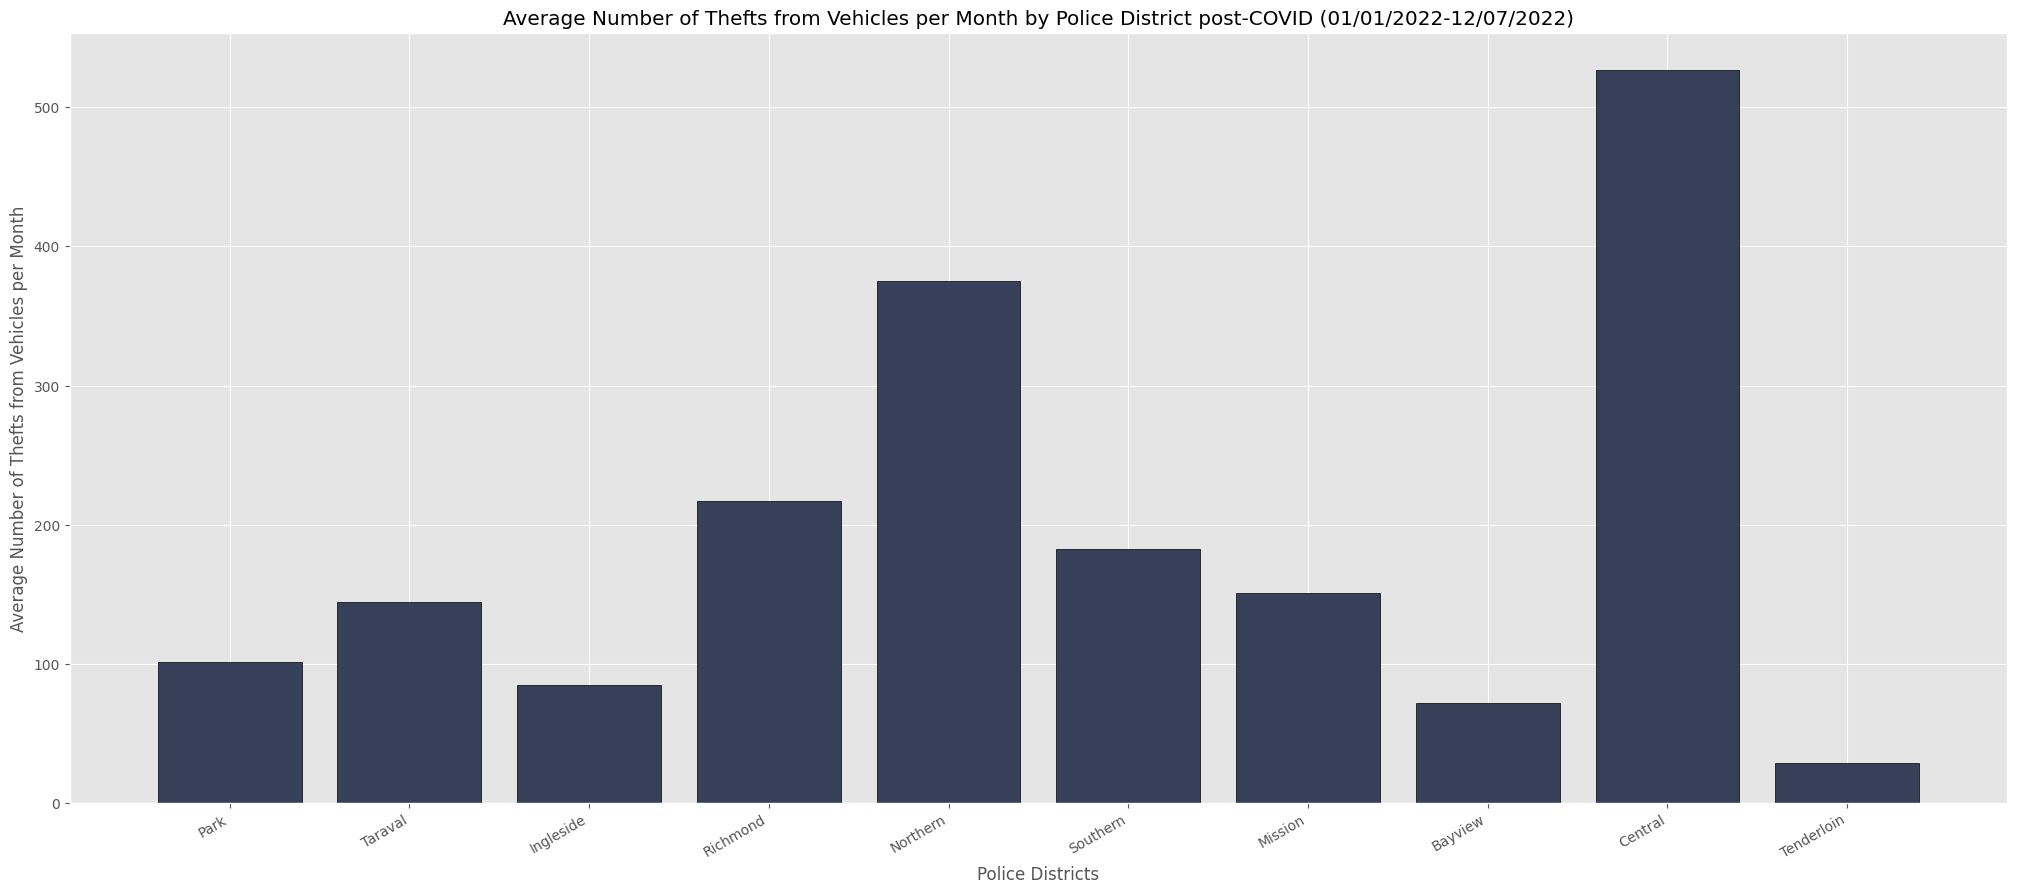

In [121]:
ax= plt.subplot()
plt.bar(post_district_counts['district'], post_district_counts['count'], color = '#364159', edgecolor = 'black')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel("Police Districts")
plt.ylabel("Average Number of Thefts from Vehicles per Month")
plt.title("Average Number of Thefts from Vehicles per Month by Police District post-COVID (01/01/2022-12/07/2022)")
plt.show()

### Combining all 3 Graphs Onto One Plot to see change over time

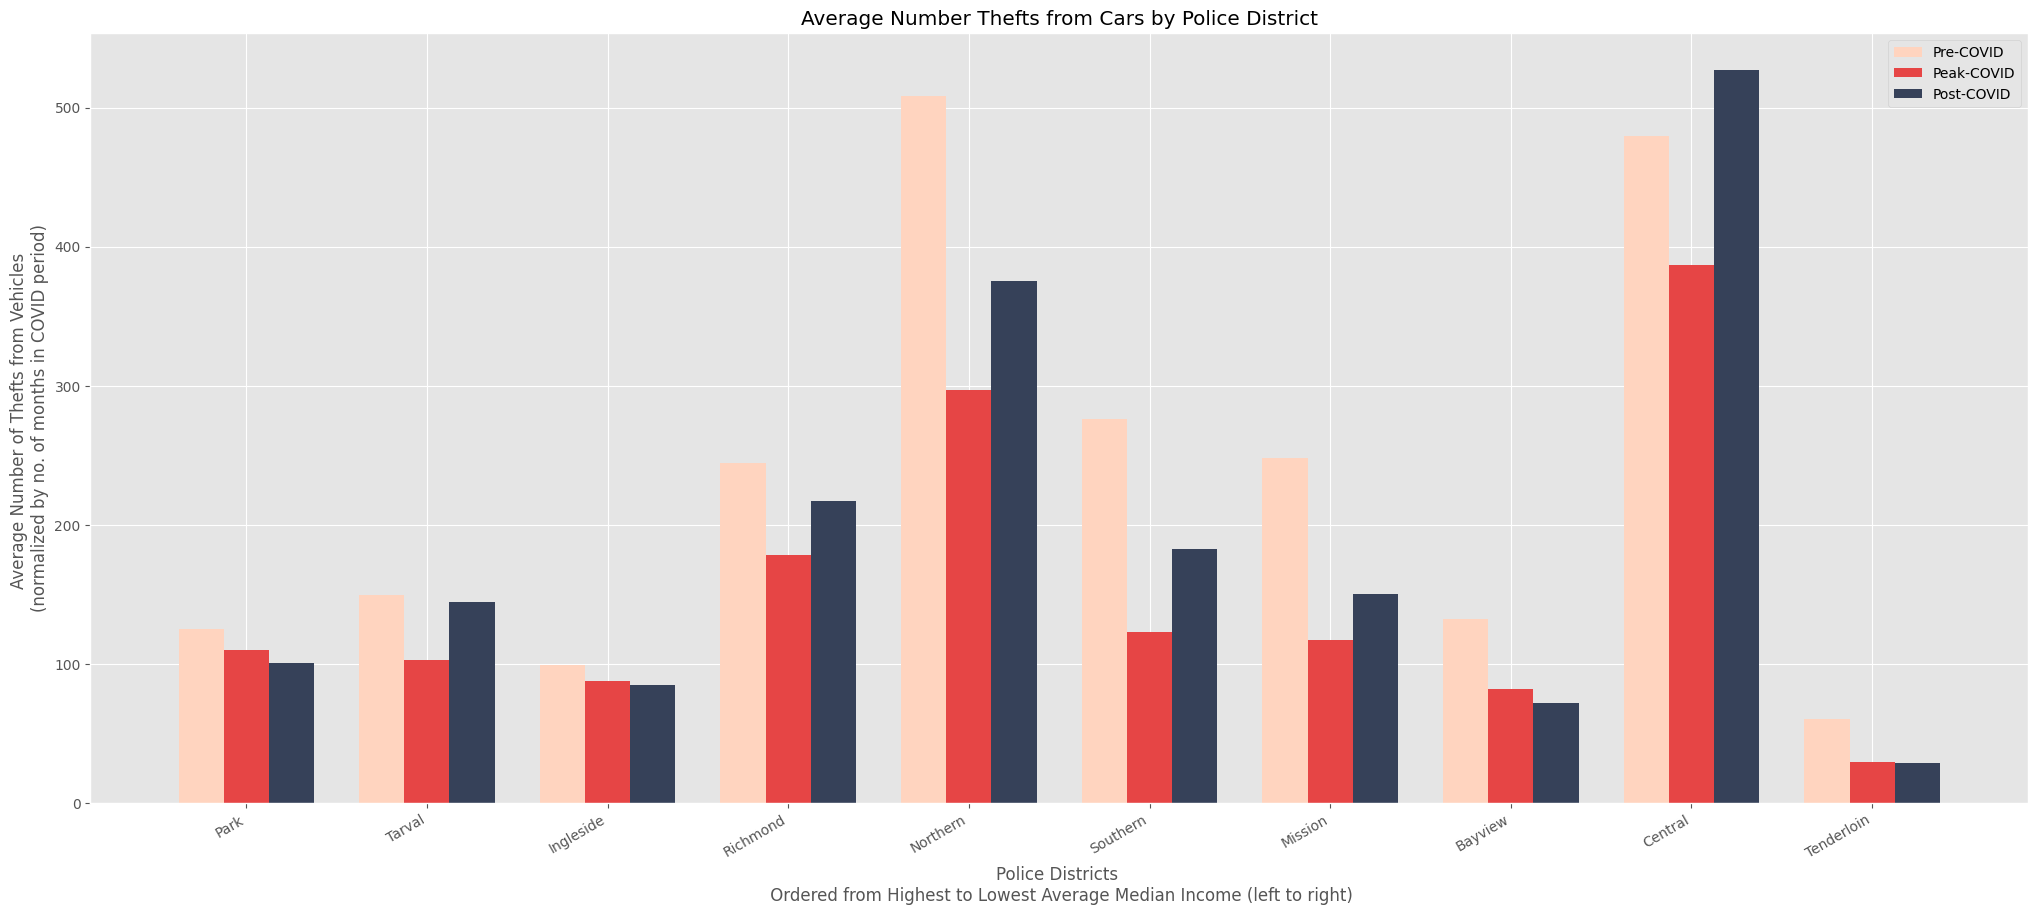

In [122]:
width = 0.25
ind = np.arange(10)
ax= plt.subplot()

pre_bar = plt.bar(ind, pre_district_counts['count'], width, color = '#ffd4bf')
peak_bar = plt.bar(ind+width, peak_district_counts['count'], width, color = '#e64545')
post_bar = plt.bar(ind+(2*width), post_district_counts['count'], width,color = '#364159')

plt.xlabel("Police Districts \n Ordered from Highest to Lowest Average Median Income (left to right)")
plt.ylabel('Average Number of Thefts from Vehicles \n(normalized by no. of months in COVID period)')
plt.title('Average Number Thefts from Cars by Police District')
plt.style.use('ggplot') 
plt.xticks(ind+width,['Park','Tarval','Ingleside','Richmond','Northern','Southern','Mission', 'Bayview','Central', 'Tenderloin'])
plt.legend( (pre_bar, peak_bar, post_bar), ('Pre-COVID', 'Peak-COVID', 'Post-COVID') )
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

## Heatmaps of Thefts from Vehicles per District and COVID period

In [123]:
# import relevant packages
import geopandas as gpd
#from shapely.geometry import Point
import adjustText as aT


# import relevant data
#shp files taken from datasf.gov
sf_map = gpd.read_file("./Current Police Districts/geo_export_6fa94911-15c1-4125-b0e8-5ec04edd81a3.shp")

sf_map["center"] = sf_map["geometry"].centroid
sf_map["rep"] = sf_map["geometry"].representative_point()
sf_points = sf_map.copy()
sf_points.set_geometry("rep", inplace = True)
sf_map 


/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/2641345598.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_map["center"] = sf_map["geometry"].centroid


,company,district,shape_area,shape_le_1,shape_leng,geometry,center,rep
0,B,SOUTHERN,9.134414e+07,100231.353916,87550.275142,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",POINT (-122.39094 37.78834),POINT (-122.39951 37.77876)
1,C,BAYVIEW,2.013846e+08,144143.480351,163013.798332,"POLYGON ((-122.38098 37.76480, -122.38103 37.7...",POINT (-122.38964 37.73433),POINT (-122.39110 37.73664)
2,D,MISSION,8.062384e+07,40518.834235,40152.783389,"POLYGON ((-122.40954 37.76932, -122.40862 37.7...",POINT (-122.42265 37.75757),POINT (-122.42401 37.75785)
3,E,NORTHERN,8.278169e+07,50608.310321,56493.858208,"POLYGON ((-122.43379 37.80793, -122.43375 37.8...",POINT (-122.43176 37.78998),POINT (-122.42994 37.78984)
4,J,TENDERLOIN,1.107215e+07,18796.784185,12424.268969,"POLYGON ((-122.40217 37.78626, -122.41718 37.7...",POINT (-122.41276 37.78237),POINT (-122.41357 37.77990)
5,A,CENTRAL,5.595027e+07,67686.522865,64025.129073,"POLYGON ((-122.42612 37.80684, -122.42612 37.8...",POINT (-122.40916 37.79791),POINT (-122.40837 37.79814)
6,F,PARK,8.487896e+07,50328.913294,46307.776968,"POLYGON ((-122.43956 37.78314, -122.43832 37.7...",POINT (-122.44911 37.76435),POINT (-122.44925 37.76354)
7,G,RICHMOND,1.379640e+08,75188.628361,69991.465355,"POLYGON ((-122.44127 37.79149, -122.44060 37.7...",POINT (-122.47932 37.77758),POINT (-122.48251 37.77865)
8,H,INGLESIDE,1.935805e+08,74474.181164,74737.936295,"POLYGON ((-122.40450 37.74858, -122.40407 37.7...",POINT (-122.43159 37.72788),POINT (-122.43972 37.72855)
9,I,TARAVAL,2.846767e+08,73470.424000,75350.217521,"POLYGON ((-122.49842 37.70810, -122.49842 37.7...",POINT (-122.48183 37.73663),POINT (-122.48426 37.73706)


In [124]:
#reformat our peak district counts dataframe to match the shp file names
peak_district_counts['district'] = peak_district_counts['district'].str.upper()
peak_district_counts

,district,count,avg_med_income_rank
5,PARK,109.813953,1
6,TARAVAL,102.558140,2
7,INGLESIDE,87.627907,3
2,RICHMOND,178.372093,4
1,NORTHERN,297.023256,5
3,SOUTHERN,122.697674,6
4,MISSION,117.023256,7
8,BAYVIEW,82.186047,8
0,CENTRAL,386.604651,9
9,TENDERLOIN,29.488372,10


In [125]:
#merge these two dataframes together
sf_incidents_map_peak=sf_map.merge(peak_district_counts, on="district")
sf_incidents_map_peak

,company,district,shape_area,shape_le_1,shape_leng,geometry,center,rep,count,avg_med_income_rank
0,B,SOUTHERN,9.134414e+07,100231.353916,87550.275142,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917...",POINT (-122.39094 37.78834),POINT (-122.39951 37.77876),122.697674,6
1,C,BAYVIEW,2.013846e+08,144143.480351,163013.798332,"POLYGON ((-122.38098 37.76480, -122.38103 37.7...",POINT (-122.38964 37.73433),POINT (-122.39110 37.73664),82.186047,8
2,D,MISSION,8.062384e+07,40518.834235,40152.783389,"POLYGON ((-122.40954 37.76932, -122.40862 37.7...",POINT (-122.42265 37.75757),POINT (-122.42401 37.75785),117.023256,7
3,E,NORTHERN,8.278169e+07,50608.310321,56493.858208,"POLYGON ((-122.43379 37.80793, -122.43375 37.8...",POINT (-122.43176 37.78998),POINT (-122.42994 37.78984),297.023256,5
4,J,TENDERLOIN,1.107215e+07,18796.784185,12424.268969,"POLYGON ((-122.40217 37.78626, -122.41718 37.7...",POINT (-122.41276 37.78237),POINT (-122.41357 37.77990),29.488372,10
5,A,CENTRAL,5.595027e+07,67686.522865,64025.129073,"POLYGON ((-122.42612 37.80684, -122.42612 37.8...",POINT (-122.40916 37.79791),POINT (-122.40837 37.79814),386.604651,9
6,F,PARK,8.487896e+07,50328.913294,46307.776968,"POLYGON ((-122.43956 37.78314, -122.43832 37.7...",POINT (-122.44911 37.76435),POINT (-122.44925 37.76354),109.813953,1
7,G,RICHMOND,1.379640e+08,75188.628361,69991.465355,"POLYGON ((-122.44127 37.79149, -122.44060 37.7...",POINT (-122.47932 37.77758),POINT (-122.48251 37.77865),178.372093,4
8,H,INGLESIDE,1.935805e+08,74474.181164,74737.936295,"POLYGON ((-122.40450 37.74858, -122.40407 37.7...",POINT (-122.43159 37.72788),POINT (-122.43972 37.72855),87.627907,3
9,I,TARAVAL,2.846767e+08,73470.424000,75350.217521,"POLYGON ((-122.49842 37.70810, -122.49842 37.7...",POINT (-122.48183 37.73663),POINT (-122.48426 37.73706),102.558140,2


### Peak-COVID Heat Map

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/3754891581.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info, shrink = 0.5,label = "Theft Count")


Text(0.5, 1.0, 'Thefts from Vehicles Across Police Districts (peak-COVID)')

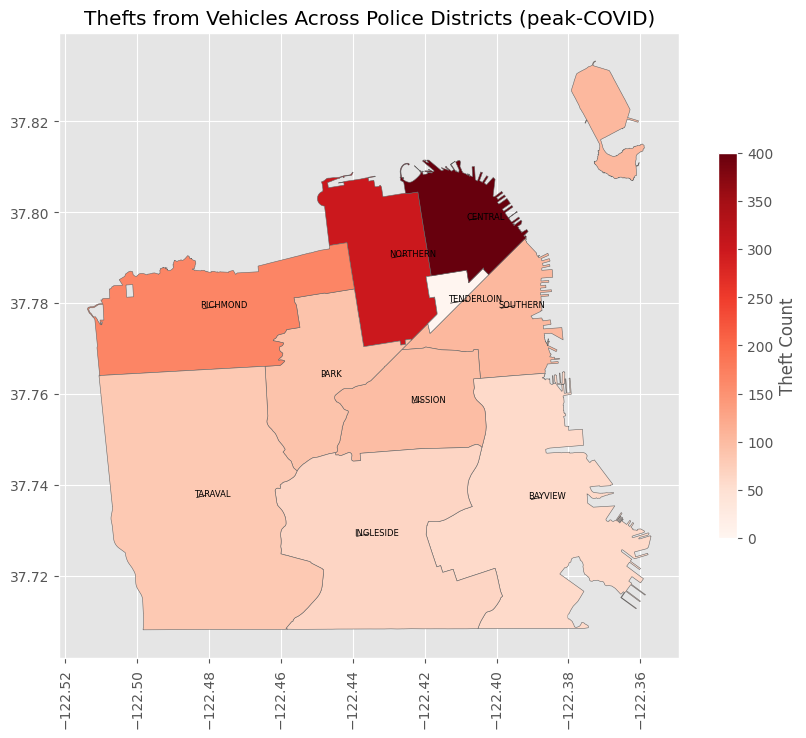

In [126]:
#plot

#plot the color map
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.xticks(rotation=90)
sf_incidents_map_peak.plot(column="count", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")


#add labels
texts = []
for x, y, label in zip(sf_points.geometry.x, sf_points.geometry.y, sf_points["district"]):
    texts.append(plt.text(x, y, label, fontsize = 6))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='black', lw=0.5))


#add legend to the side
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=400))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink = 0.5,label = "Theft Count")
plt.title("Thefts from Vehicles Across Police Districts (peak-COVID)")

### Pre-COVID Heat Map

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/2096609785.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info, shrink = 0.5,label = "Theft Count")


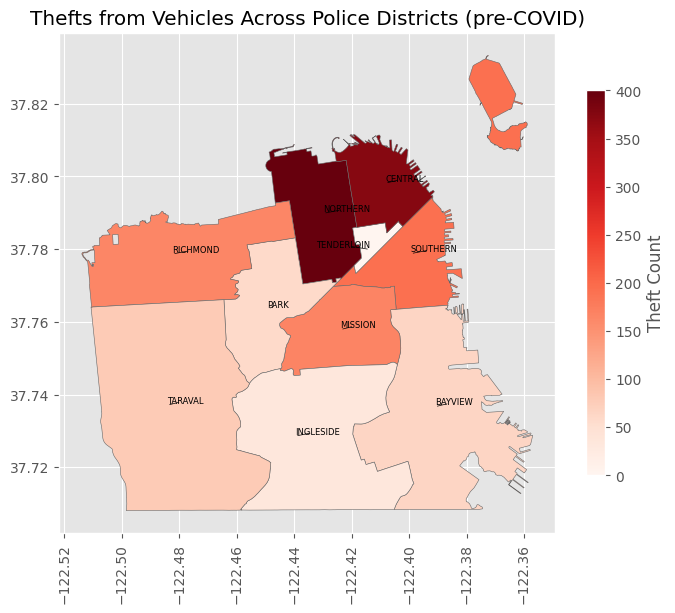

In [127]:
#reformat our pre district counts dataframe to match the shp file names
pre_district_counts['district'] = pre_district_counts['district'].str.upper()

#merge these two dataframes together
sf_incidents_map_pre=sf_map.merge(pre_district_counts, on="district")

#plot pre
fig, ax = plt.subplots(1, figsize=(8, 10))
plt.xticks(rotation=90)
sf_incidents_map_pre.plot(column="count", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
#add labels
texts = []
for x, y, label in zip(sf_points.geometry.x, sf_points.geometry.y, sf_points["district"]):
    texts.append(plt.text(x, y, label, fontsize = 6))
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=400))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink = 0.5,label = "Theft Count")
plt.title("Thefts from Vehicles Across Police Districts (pre-COVID)");

### Post-COVID Heat Map

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/1249391401.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info, shrink = 0.5, label = "Theft Count")


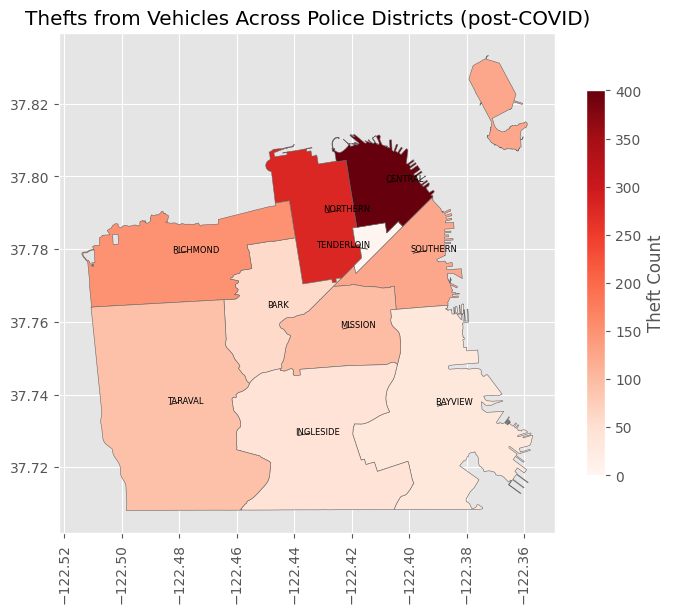

In [128]:
#reformat our post district counts dataframe to match the shp file names
post_district_counts['district'] = post_district_counts['district'].str.upper()

#merge these two dataframes together
sf_incidents_map_post=sf_map.merge(post_district_counts, on="district")

#plot pre
fig, ax = plt.subplots(1, figsize=(8, 10))
plt.xticks(rotation=90)
sf_incidents_map_post.plot(column="count", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
#add labels
texts = []
for x, y, label in zip(sf_points.geometry.x, sf_points.geometry.y, sf_points["district"]):
    texts.append(plt.text(x, y, label, fontsize = 6))
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=400))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink = 0.5, label = "Theft Count")
plt.title("Thefts from Vehicles Across Police Districts (post-COVID)");

## **Trends in Resolutions of Cases involving Thefts from Vehicles**

### Open or Active Cases/Cite or Adult Arrest Cases

In [129]:
len(sf_car_thefts.index)

113400

There are 113,400 rows in the data we are looking at.

In [130]:
#number of open or active
open_or_active = sf_car_thefts[sf_car_thefts['Resolution'] == 'Open or Active']
len(open_or_active.index)

112703

In [131]:
#number of cite or arrest adult cases
cites = sf_car_thefts[sf_car_thefts['Resolution'] == 'Cite or Arrest Adult']
len(cites.index)

663

In [132]:
#number of non-cases that are open/active or cit/arrest adult
113400 - (112703+663)

34

### Grouping by Police District and Type of Resolution

In [133]:
thefts_resolution_by_district = sf_car_thefts.groupby(["Police District", "Resolution"])['Incident Subcategory'].count()
thefts_resolution_by_district = pd.DataFrame(thefts_resolution_by_district)
thefts_resolution_by_district


Incident Subcategory
Police District Resolution                                
Bayview         Cite or Arrest Adult                    47
                Exceptional Adult                        1
                Open or Active                        5958
                Unfounded                                2
Central         Cite or Arrest Adult                   138
                Open or Active                       26277
                Unfounded                                5
Ingleside       Cite or Arrest Adult                    32
                Open or Active                        5342
Mission         Cite or Arrest Adult                    78
                Open or Active                       10547
                Unfounded                                1
Northern        Cite or Arrest Adult                   119
                Exceptional Adult                        2
                Open or Active                       23574
                Unfounded                                2
Park            Cite or Arrest Adult                    39
                Exceptional Adult                        2
                Open or Active                        6673
                Unfounded                                6
Richmond        Cite or Arrest Adult                    30
                Exceptional Adult                        1
                Open or Active                       12502
                Unfounded                                2
Southern        Cite or Arrest Adult                    85
                Exceptional Adult                        1
                Open or Active                       11744
                Unfounded                                5
Taraval         Cite or Arrest Adult                    57
                Open or Active                        7594
                Unfounded                                3
Tenderloin      Cite or Arrest Adult                    38
                Open or Active                        2492
                Unfounded                                1

In [134]:
#grouping seems to match expected 
5958+26277+5342+10547+23574+6673+12502+11744+7594+2492

112703

### Percentages of Resolutions (Non-Open or Active): Cites or Arrest Adult, Unfounded, and Exceptional Adult

In [135]:
#calculating each percentage of cites or arrest adult in each district 
#(number of cites or arrest adult in district, unfounded, and/or exceptional adult / all cases in district)
#rounded to 2 decimal points

bayview_percentage = ((47+1+2)/(47+1+5958+2)) * 100
print((round(bayview_percentage,2)))

central_percentage = ((138+5)/(138+26277+5)) * 100
print(round(central_percentage,2))

ingleside_percentage = ((32)/(32+5342)) * 100
print(round(ingleside_percentage,2))

mission_percentage = ((78+1)/(78+10547+1)) * 100
print(round(mission_percentage,2))

northern_percentage = ((119+2+2)/(119+2+23574+2)) * 100
print(round(northern_percentage,2))

park_percentage = ((39+2+6)/(39+2+6673+6)) * 100
print(round(park_percentage,2))

richmond_percentage = ((30+1+2)/(30+1+12502 +2)) * 100
print(round(richmond_percentage,2))

sothern_percentage = ((85+1+5)/(85+ 1+11744 + 5)) * 100
print(round(sothern_percentage,2))

taraval_percentage = ((57+3)/(57+3+7594)) * 100
print(round(taraval_percentage,2))

tenderloin_percentage = ((38+1)/(38+2492 +1)) * 100
print(round(tenderloin_percentage,2))

0.83
0.54
0.6
0.74
0.52
0.7
0.26
0.77
0.78
1.54


In [136]:
percentage_of_open_or_active_cases = {'Police District':  ['Bayview', 'Central ', 'Ingleside', 'Mission', 'Northern', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin'],
        'Percentage of Resolved Incident Reports': ['0.83', '0.54', '0.60', '0.74', '0.52', '0.70', '0.26', '0.77', '0.78', '1.54'],
        }

In [137]:
percentage_of_open_or_active_cases_chart = pd.DataFrame(percentage_of_open_or_active_cases)

percentage_of_open_or_active_cases_chart = percentage_of_open_or_active_cases_chart.sort_values(by=['Percentage of Resolved Incident Reports'])
percentage_of_open_or_active_cases_chart.style.hide_index()

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/2133305134.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  percentage_of_open_or_active_cases_chart.style.hide_index()


Police District,Percentage of Resolved Incident Reports
Richmond,0.26
Northern,0.52
Central,0.54
Ingleside,0.60
Park,0.70
Mission,0.74
Southern,0.77
Taraval,0.78
Bayview,0.83
Tenderloin,1.54


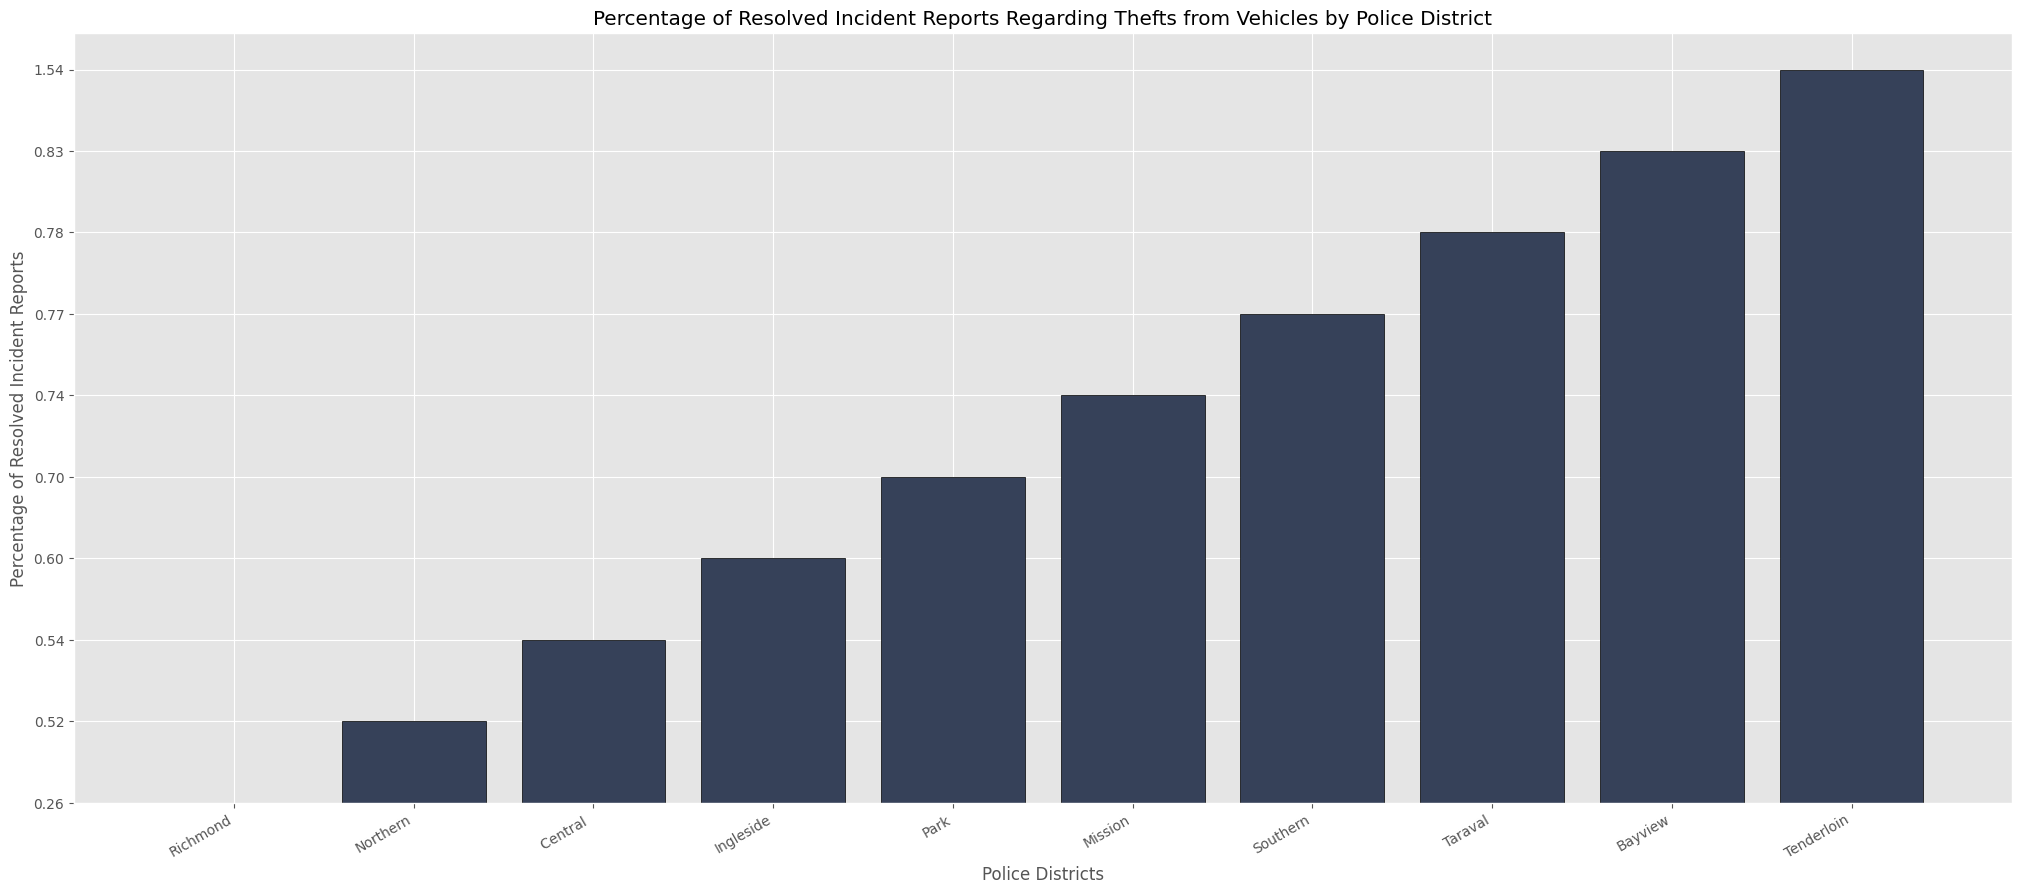

In [138]:
ax= plt.subplot()
plt.bar(percentage_of_open_or_active_cases_chart['Police District'], percentage_of_open_or_active_cases_chart['Percentage of Resolved Incident Reports'], color = '#364159', edgecolor = 'black')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
#plt.ylim(0,2)
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Police Districts")
plt.ylabel("Percentage of Resolved Incident Reports")
plt.title("Percentage of Resolved Incident Reports Regarding Thefts from Vehicles by Police District")
plt.show()


### Open or Active Incident Report Percentage

In [139]:
#calculating each percentage of Open or Active Resolutions in each district 
#(number of Open or Active in district / all cases in district)
#rounded to 2 decimal points

bayview_percentage_open = ((5958)/(47+1+5958+2)) * 100
print(round(bayview_percentage_open,2))

central_percentage = ((26277)/(138+26277+ 5)) * 100
print(round(central_percentage,2))

ingleside_percentage = ((5342)/(32+5342)) * 100
print(round(ingleside_percentage,2))

mission_percentage = ((10547)/(78+10547+1)) * 100
print(round(mission_percentage,2))

northern_percentage = ((23574)/(119+ 2+ 23574+2)) * 100
print(round(northern_percentage,2))

park_percentage = ((6673)/(39+ 2+ 6673+6)) * 100
print(round(park_percentage,2))

richmond_percentage = ((12502)/(30+ 1+12502 + 2)) * 100
print(round(richmond_percentage,2))

sothern_percentage = ((11744)/(85+ 1+11744 + 5)) * 100
print(round(sothern_percentage,2))

taraval_percentage = ((7594)/(57+7594 + 3)) * 100
print(round(taraval_percentage,2))

tenderloin_percentage = ((2492)/( 38+2492 + 1)) * 100
print(round(tenderloin_percentage,2))

99.17
99.46
99.4
99.26
99.48
99.3
99.74
99.23
99.22
98.46


In [140]:
open_or_active_data = {'Police District':  ['Bayview', 'Central ', 'Ingleside', 'Mission', 'Northern', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin'],
        'Percentage of Open or Active': ['99.17', '99.46', '99.40', '99.26', '99.48', '99.30', '99.74', '99.23', '99.22', '98.46'],
        }

open_or_active_data_chart = pd.DataFrame(open_or_active_data)
open_or_active_data_chart = open_or_active_data_chart.sort_values(by=['Percentage of Open or Active'])
open_or_active_data_chart.style.hide_index()

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/1230681816.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  open_or_active_data_chart.style.hide_index()


Police District,Percentage of Open or Active
Tenderloin,98.46
Bayview,99.17
Taraval,99.22
Southern,99.23
Mission,99.26
Park,99.30
Ingleside,99.40
Central,99.46
Northern,99.48
Richmond,99.74


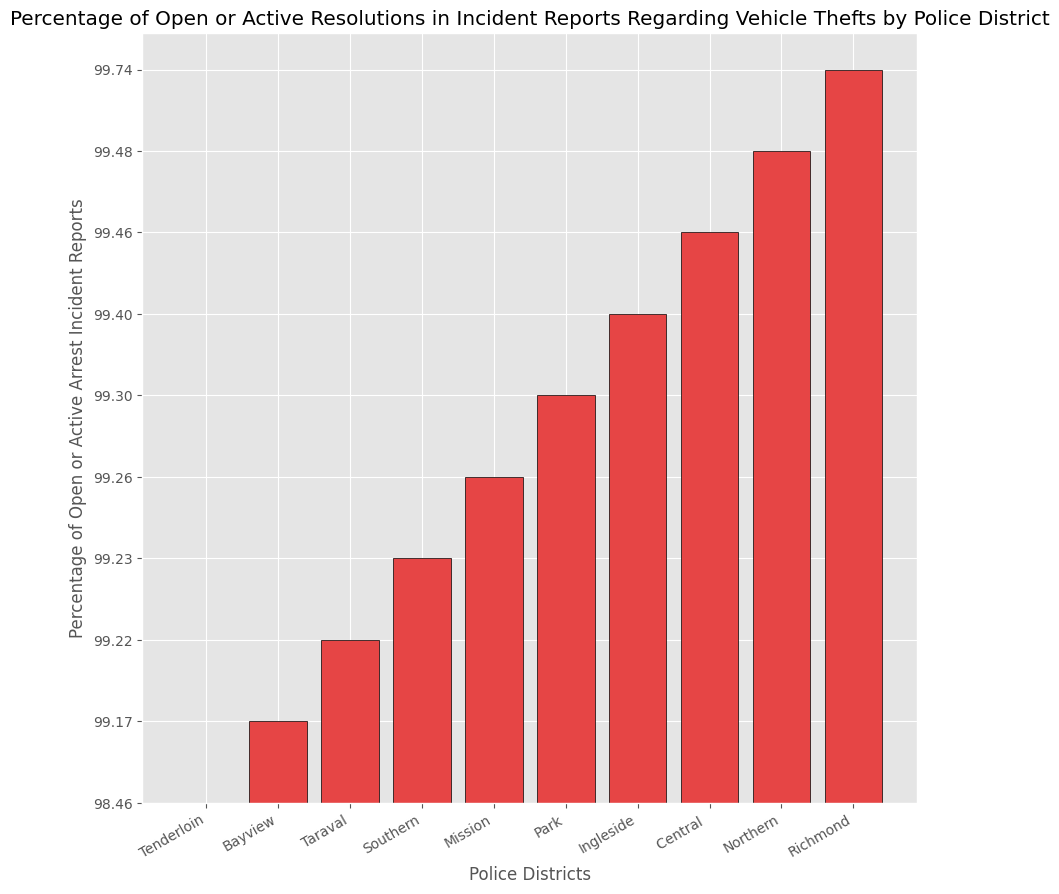

In [141]:
ax= plt.subplot()
plt.bar(open_or_active_data_chart['Police District'], open_or_active_data_chart['Percentage of Open or Active'], color = '#e64545',edgecolor = 'black')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
#plt.ylim(98,100)
plt.xlabel("Police Districts")
plt.ylabel("Percentage of Open or Active Arrest Incident Reports")
plt.title("Percentage of Open or Active Resolutions in Incident Reports Regarding Vehicle Thefts by Police District")


plt.show()

### Merged Table of Resolved Cases vs. Open Cases

In [142]:
merged = pd.merge(open_or_active_data_chart, percentage_of_open_or_active_cases_chart, on='Police District')
merged.style.hide_index()

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/3383775302.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  merged.style.hide_index()


Police District,Percentage of Open or Active,Percentage of Resolved Incident Reports
Tenderloin,98.46,1.54
Bayview,99.17,0.83
Taraval,99.22,0.78
Southern,99.23,0.77
Mission,99.26,0.74
Park,99.30,0.70
Ingleside,99.40,0.60
Central,99.46,0.54
Northern,99.48,0.52
Richmond,99.74,0.26


In [143]:
pd.to_numeric(merged['Percentage of Open or Active'])
pd.to_numeric(merged['Percentage of Resolved Incident Reports'])
merged['Percentage of Open or Active'] = merged['Percentage of Open or Active'].astype(float)
merged['Percentage of Resolved Incident Reports'] = merged['Percentage of Resolved Incident Reports'].astype(float)


### Basic Charts

In [144]:
data_num_open = {'Police District':  ['Bayview', 'Central ', 'Ingleside', 'Mission', 'Northern', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin', 'Total'],
        'Number of Open or Active': ['5958', '26277', '5342', '10547', '23574', '6673', ' 12502', '11744', '7594', '2492', '112703'],
        }

open_or_active_num = pd.DataFrame(data_num_open)
open_or_active_num.style.hide_index()



/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/3337774506.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  open_or_active_num.style.hide_index()


Police District,Number of Open or Active
Bayview,5958
Central,26277
Ingleside,5342
Mission,10547
Northern,23574
Park,6673
Richmond,12502
Southern,11744
Taraval,7594
Tenderloin,2492


In [145]:
data_num_arrests = {'Police District':  ['Bayview', 'Central ', 'Ingleside', 'Mission', 'Northern', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin', 'Total'],
        'Number of Cite or Arrest Adult Resolution': ['47', '138', '32', '78', '119', '39', ' 30', '85', '57', '38', '663'],
        }

data_num_arrests = pd.DataFrame(data_num_arrests)
data_num_arrests.style.hide_index()

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/4126585662.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  data_num_arrests.style.hide_index()


Police District,Number of Cite or Arrest Adult Resolution
Bayview,47
Central,138
Ingleside,32
Mission,78
Northern,119
Park,39
Richmond,30
Southern,85
Taraval,57
Tenderloin,38


In [146]:
percentage_arrests = {'Area':  ['San Francisco'],
        'Percentage of Overall Arrests for Larceny From Vehicle': ['0.58'],
                      'Percentage of Overall Arrests': ['19.32%']
        
        }

percentage_arrests = pd.DataFrame(percentage_arrests)
percentage_arrests.style.hide_index()

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/1930433005.py:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  percentage_arrests.style.hide_index()


Area,Percentage of Overall Arrests for Larceny From Vehicle,Percentage of Overall Arrests
San Francisco,0.58,19.32%


In [147]:
#income table
district_incomes = {'Police District': ['Bayview', 'Central ', 'Ingleside', 'Mission', 'Northern', 'Park', 'Richmond', 'Southern', 'Taraval', 'Tenderloin'],
'Average Median Income ($)' : [63991, 61953, 86370, 72444, 74620, 90265, 81589, 73331, 89006, 42307 ]
}
district_incomes = pd.DataFrame(district_incomes)
district_incomes = district_incomes.sort_values(by=['Average Median Income ($)'], ascending=True)
district_incomes.style.hide_index()

/var/folders/1n/l408dt9x1gqby7gfsm4msqjc0000gn/T/ipykernel_40309/131912346.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  district_incomes.style.hide_index()


Police District,Average Median Income ($)
Tenderloin,42307
Central,61953
Bayview,63991
Mission,72444
Southern,73331
Northern,74620
Richmond,81589
Ingleside,86370
Taraval,89006
Park,90265
